In [1]:
from config import *

C:\Users\CREST\AppData\Roaming\Python\Python38\site-packages\bs4\element.py:15: UserWarning: The soupsieve package is not installed. CSS selectors cannot be used.
  warnings.warn(


In [2]:
for key, val in process_date.items():
    ms = idp.Metashape(val['project'], val['chunk_id'])
    ms.dom = idp.GeoTiff(val['dom'])
    ms.dsm = idp.GeoTiff(val['dsm'])
    break

# Calculate the root positions on Raw images

In [3]:
idp.shp.show_shp_fields(root_shp)

  [-1]   [0] name
------  ----------
     0      1
     1      4
     2      6
   ...     ...
 11095     8001
 11096     7488
 11097    10385


In [4]:
points = idp.shp.read_shp(root_shp, shp_proj=ms.dom.crs, name_field=0)

[shp][proj] Use projection [WGS 84 / UTM zone 54N] for loaded shapefile [ordered_center_points.shp]


Read shapefile [ordered_center_points.shp]: 100%|██████████| 11098/11098 [06:44<00:00, 27.40it/s]


In [5]:
points_np2d = np.zeros((0,2))
for k, p in points.items():
    points_np2d = np.vstack([points_np2d, p])

save to cache for faster read

In [90]:
import pickle

In [88]:
pickle_file = "__pycache__/points_np2d.pkl"

In [91]:
with open(pickle_file, 'wb') as handle:
    pickle.dump(points_np2d, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [92]:
with open(pickle_file, 'rb') as handle:
    points_np2d_pkled = pickle.load(handle)

In [93]:
points_np2d_pkled

array([[ 368059.70337271, 3956057.88353261],
       [ 368059.93162897, 3956056.75447929],
       [ 368060.07021313, 3956056.04525446],
       ...,
       [ 368101.64654537, 3956066.66905537],
       [ 368102.57079688, 3956049.19636116],
       [ 368123.85824642, 3956022.79668753]])

Continue

In [6]:
p = idp.ROI()

In [7]:
p[0] = points_np2d

In [8]:
p.crs = ms.dom.crs

In [9]:
p.get_z_from_dsm(ms.dsm,  mode='point', buffer=0.1, kernel='mean')

Read z values of roi from DSM [broccoli_tanashi_5_20220321_0_dsm.tif]: 100%|██████████| 1/1 [01:12<00:00, 72.40s/it]


In [10]:
p[0]

array([[3.68059703e+05, 3.95605788e+06, 9.68739624e+01],
       [3.68059932e+05, 3.95605675e+06, 9.69297638e+01],
       [3.68060070e+05, 3.95605605e+06, 9.69466858e+01],
       ...,
       [3.68101647e+05, 3.95606667e+06, 9.66055145e+01],
       [3.68102571e+05, 3.95604920e+06, 9.66551895e+01],
       [3.68123858e+05, 3.95602280e+06, 9.67921753e+01]])

In [11]:
out = ms.back2raw(p, ignore='as_point')

Backward roi to raw images: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


In [14]:
out[0]['DJI_0001']

array([[2.51643043e+03, 2.13269353e+03],
       [2.80266871e+03, 2.15624874e+03],
       [2.98250276e+03, 2.17170842e+03],
       [3.48423112e+03, 9.95758053e+02],
       [2.61025192e+03, 1.97489390e+03],
       [2.69152354e+03, 9.36289971e+02],
       [2.78512904e+03, 1.81263839e+03],
       [2.91097843e+03, 2.00742703e+03],
       [2.73105413e+03, 1.63230885e+03],
       [2.72366589e+03, 1.45400929e+03],
       [3.15786793e+03, 1.32823424e+03],
       [3.19009759e+03, 2.02039288e+03],
       [3.30217879e+03, 9.89331718e+02],
       [2.73842566e+03, 2.00206900e+03],
       [2.93889836e+03, 9.70001253e+02],
       [2.65010462e+03, 1.63730705e+03],
       [2.80496930e+03, 1.46257025e+03],
       [2.89450199e+03, 1.12620321e+03],
       [2.80713899e+03, 1.29858229e+03],
       [3.00099268e+03, 2.01323337e+03],
       [2.71719211e+03, 2.15558970e+03],
       [3.07533847e+03, 1.48272486e+03],
       [3.01494416e+03, 1.67044823e+03],
       [2.86734954e+03, 7.96287455e+02],
       [2.856108

In [15]:
deeplab_dict = {}

for img in out[0].keys():
    deeplab_dict[img] = {
        "imagePath": ms.photos[img].path,
        "points": out[0][img].tolist()
    }

In [18]:
f"{project_data_folder}/{working_spacename}/{ms.project_name}-{ms.chunk_id}-head_position.json"

'Z:/hwang_Pro/data/2022_tanashi_broccoli/12_head_segment/broccoli_autumn21-20220321_0.json'

In [19]:
idp.jsonfile.dict2json(deeplab_dict, f"{project_data_folder}/{working_spacename}/{ms.project_name}-{ms.chunk_id}.json")

# Calculate the grids to raw images

In [22]:
grid_shp = f"{project_data_folder}/02_GIS/split_grid.shp"

In [24]:
roi = idp.ROI(grid_shp, name_field=0)

[shp][proj] Use projection [WGS 84 / UTM zone 54N] for loaded shapefile [split_grid.shp]


Read shapefile [split_grid.shp]: 100%|██████████| 504/504 [00:01<00:00, 384.30it/s]


In [25]:
roi.get_z_from_dsm(ms.dsm)

Read z values of roi from DSM [broccoli_tanashi_5_20220321_0_dsm.tif]: 100%|██████████| 504/504 [00:14<00:00, 35.13it/s]


In [26]:
roi

<easyidp.ROI> with 504 items
[0]	1
array([[ 368058.59787001, 3956058.88557004,      96.70735931],
       [ 368061.04143287, 3956059.41377509,      96.70735931],
       [ 368061.56963791, 3956056.97021223,      96.70735931],
       [ 368059.12607505, 3956056.44200719,      96.70735931],
       [ 368058.59787001, 3956058.88557004,      96.70735931]])
[1]	2
array([[ 368059.12607505, 3956056.44200719,      96.78060913],
       [ 368061.56963791, 3956056.97021223,      96.78060913],
       [ 368062.09784295, 3956054.52664938,      96.78060913],
       [ 368059.6542801 , 3956053.99844433,      96.78060913],
       [ 368059.12607505, 3956056.44200719,      96.78060913]])
...
[502]	595
array([[ 368124.83571154, 3956024.6065918 ,      96.68289185],
       [ 368127.27927439, 3956025.13479684,      96.68289185],
       [ 368127.80747944, 3956022.69123398,      96.68289185],
       [ 368125.36391658, 3956022.16302894,      96.68289185],
       [ 368124.83571154, 3956024.6065918 ,      96.68289185]

In [27]:
img_dict = ms.back2raw(roi)

Backward roi to raw images: 100%|██████████| 504/504 [00:11<00:00, 45.68it/s]


In [28]:
img_dict_sort = ms.sort_img_by_distance(img_dict, roi, num=1)

Filter by distance to ROI: 100%|██████████| 504/504 [00:00<00:00, 7048.03it/s]


In [29]:
img_dict_sort

{'1': {'DJI_0001': array([[2206.34154197, 2322.56154336],
         [2245.25473445, 1708.2437417 ],
         [2860.7581751 , 1748.70987063],
         [2820.29207753, 2361.44400948],
         [2206.34154197, 2322.56154336]])},
 '2': {'DJI_0001': array([[2820.94842255, 2364.32632526],
         [2861.61772276, 1748.55796467],
         [3476.52521503, 1788.7326955 ],
         [3434.33764344, 2402.47613377],
         [2820.94842255, 2364.32632526]])},
 '3': {'DJI_0999': array([[2361.40394189, 2276.22671585],
         [2400.0146532 , 1658.22510255],
         [3018.5525587 , 1698.03191464],
         [2978.42023835, 2314.32702899],
         [2361.40394189, 2276.22671585]])},
 '4': {'DJI_0998': array([[1888.927603  , 2192.50208566],
         [1924.52127873, 1574.18034315],
         [2544.32233982, 1612.48337798],
         [2507.25636585, 2229.43014535],
         [1888.927603  , 2192.50208566]])},
 '5': {'DJI_0998': array([[2507.62273543, 2228.51499321],
         [2544.61381331, 1612.82767274],
 

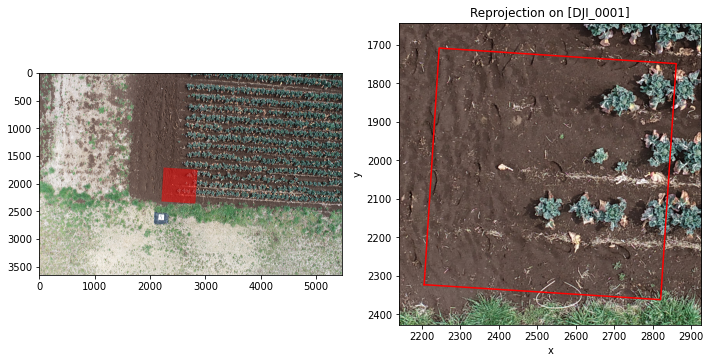

<Figure size 432x288 with 0 Axes>

In [33]:
idp.visualize.draw_polygon_on_img(
    'DJI_0001', 
    ms.photos['DJI_0001'].path,
    img_dict_sort['1']['DJI_0001'], show=True)

save the grid file as json

In [30]:
f"{project_data_folder}/{working_spacename}/{ms.project_name}-{ms.chunk_id}-grid-pixel.json"

'Z:/hwang_Pro/data/2022_tanashi_broccoli/12_head_segment/broccoli_autumn21-20220321_0-grid-pixel.json'

In [31]:
idp.jsonfile.dict2json(deeplab_dict, f"{project_data_folder}/{working_spacename}/{ms.project_name}-{ms.chunk_id}-grid-pixel.json")

## save cropped images

In [58]:
crop_image_size = 1000

In [42]:
coord = list(img_dict_sort['5'].values())[0]
coord

array([[2507.62273543, 2228.51499321],
       [2544.61381331, 1612.82767274],
       [3160.14563633, 1650.69470148],
       [3121.72668748, 2264.58279392],
       [2507.62273543, 2228.51499321]])

In [49]:
xmin, ymin = coord.min(axis=0)
xmax, ymax = coord.max(axis=0)
xlen, ylen = xmax-xmin, ymax-ymin
xctr, yctr = (xmax+xmin)/2, (ymax+ymin)/2


In [48]:
xlen, ylen

(652.522900906748, 651.7551211839445)

In [79]:
import matplotlib.pyplot as plt
import os

In [85]:
# create save folder
image_save_folder = f"{project_data_folder}/{working_spacename}/{ms.project_name}-{ms.chunk_id}"
if not os.path.exists(image_save_folder):
    os.makedirs(image_save_folder)

info_json = {}

# loops to save images
for plot_id, val in img_dict_sort.items():
    img_name = list(val.keys())[0]
    coord = list(val.values())[0]

    xmin, ymin = coord.min(axis=0)
    xmax, ymax = coord.max(axis=0)
    xlen, ylen = xmax-xmin, ymax-ymin
    xctr, yctr = (xmax+xmin)/2, (ymax+ymin)/2

    x0, x1 = xctr-crop_image_size/2, xctr+crop_image_size/2
    y0, y1 = yctr-crop_image_size/2, yctr+crop_image_size/2

    poly = np.asarray([
        [x0, y0], [x0, y1], [x1,y1], [x1, y0], [x0, y0]
    ])

    if xlen > crop_image_size or ylen > crop_image_size:
        raise ValueError(
            f"[Warning]: plot [{plot_id}] on img [{img_name}], roi size ({xlen},{ylen}) "
            f"exceed 'crop_image_size' ({crop_image_size}, {crop_image_size})")
    
    imarray = plt.imread(ms.photos[img_name].path)
    cropped, offsets = idp.cvtools.imarray_crop(imarray, poly)

    plt.imsave(f"{image_save_folder}/{plot_id}_{img_name}.png", cropped)

    # calculate the head positions on cropped image
    head_positions = out[0][img_name]
    ## in the cropped range
    head_inside = head_positions[(head_positions[:,0] > xmin) & (head_positions[:,0] < xmax) & 
                                 (head_positions[:,1] > ymin) & (head_positions[:,1] < ymax), :]

    info_json[f'{plot_id}_{img_name}'] = {
        "rawImagePath": ms.photos[img_name].path,
        "cropedImagePath": f"{image_save_folder}/{plot_id}_{img_name}.png",

        "cropLeftTopCorner": offsets,
        
        "gridCoordOnCroppedImage": coord - offsets,

        "headCoordOnRawImage": head_positions,
        "headCoordOnCroppedImage": head_inside - offsets,
    }
    break

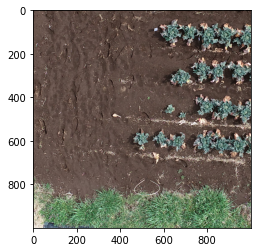

In [70]:
plt.imshow(cropped)

In [72]:
poly

array([[2033.54985854, 1534.84387559],
       [2033.54985854, 2534.84387559],
       [3033.54985854, 2534.84387559],
       [3033.54985854, 1534.84387559],
       [2033.54985854, 1534.84387559]])

In [71]:
offsets

array([2033, 1534], dtype=uint32)

In [82]:
coord - offsets

array([[173.34154197, 788.56154336],
       [212.25473445, 174.2437417 ],
       [827.7581751 , 214.70987063],
       [787.29207753, 827.44400948],
       [173.34154197, 788.56154336]])

Also need to save this offsets

In [84]:
head_positions = out[0][img_name]
head_inside = head_positions[(head_positions[:,0] > xmin) & (head_positions[:,0] < xmax) & 
                             (head_positions[:,1] > ymin) & (head_positions[:,1] < ymax), :]
head_inside

array([[2516.43043166, 2132.69352608],
       [2802.6687106 , 2156.24873877],
       [2610.25191957, 1974.89390204],
       [2785.12903935, 1812.63838653],
       [2738.42566339, 2002.06899834],
       [2717.19211414, 2155.58970397],
       [2826.90088572, 1999.98089649],
       [2703.09656455, 1811.24594867],
       [2606.40756792, 2146.26630251]])

In [86]:
info_json

{'1_DJI_0001': {'rawImagePath': 'Z:\\hwang_Pro\\data\\2022_tanashi_broccoli\\00_rgb_raw\\broccoli_tanashi_5_20220321_P4RTK_15m\\DJI_0001.JPG',
  'cropedImagePath': 'Z:/hwang_Pro/data/2022_tanashi_broccoli/12_head_segment/broccoli_autumn21-20220321_0/1_DJI_0001.png',
  'cropLeftTopCorner': array([2033, 1534], dtype=uint32),
  'gridCoordOnCroppedImage': array([[173.34154197, 788.56154336],
         [212.25473445, 174.2437417 ],
         [827.7581751 , 214.70987063],
         [787.29207753, 827.44400948],
         [173.34154197, 788.56154336]]),
  'headCoordOnRawImage': array([[2.51643043e+03, 2.13269353e+03],
         [2.80266871e+03, 2.15624874e+03],
         [2.98250276e+03, 2.17170842e+03],
         [3.48423112e+03, 9.95758053e+02],
         [2.61025192e+03, 1.97489390e+03],
         [2.69152354e+03, 9.36289971e+02],
         [2.78512904e+03, 1.81263839e+03],
         [2.91097843e+03, 2.00742703e+03],
         [2.73105413e+03, 1.63230885e+03],
         [2.72366589e+03, 1.45400929e+03]